# Student Admission Mini Project

This is my own Notebook while finishing Udacity Data Science Nanodegree Mini Project in Deep Learning Part.

The original notebook provided by Udacity is typically follow-along codes, hence I create this notebook to sharpen my understanding and to tweak more on how the model work on the problem.

In [1]:
!tree

.
├── README.md
├── StudentAdmission.ipynb
└── student_data.csv

0 directories, 3 files


## Dataset

The dataset used here comprises three features:

1. GRE Scores (Test)
2. GPA Scores (Grade)
3. Class rank(1-4)

The goal is **to predict student admission to graduate school at UCLA**

## Load The Data

In [2]:
# importing pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data
data = pd.read_csv('./student_data.csv')

# data review
data.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let plot the data by ignoring `rank`

In [3]:
# function to plot
def plot_points(data):
    X = data[['gre', 'gpa']].values
    y = data['admit'].values
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0,0] for s in admitted], [s[0,1] for s in admitted], c='cyan', s=30, edgecolors='b')
    plt.scatter([s[0,0] for s in rejected], [s[0,1] for s in rejected], c='red', s=30, edgecolors='r')
    

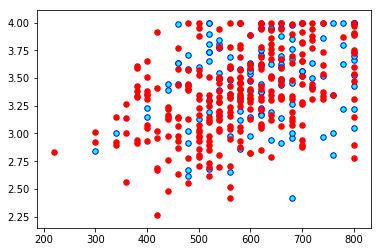

In [4]:
plot_points(data)
plt.show()

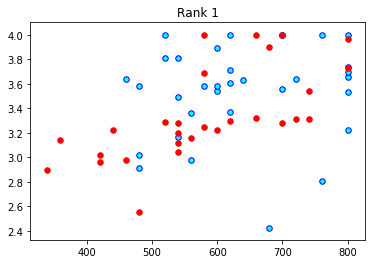

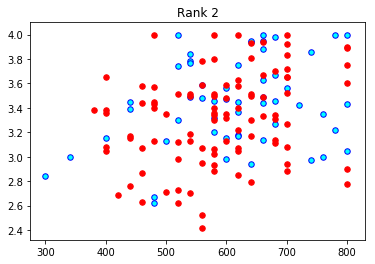

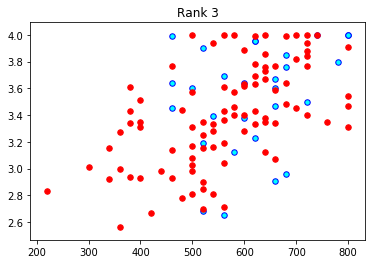

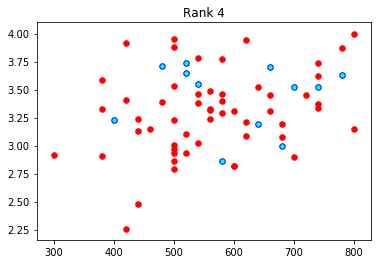

In [5]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

## One Hot Encode the `rank`

We will use `OneHotEncoding` from `sklearn.preprocessing` module. But first, because it only takes _number_ as the inputs, we need to convert the `rank` values into number using `pd.get_dummies`.

In [6]:
# convert to numbers
rank_number = pd.get_dummies(data['rank'], prefix='rank')

# concat to dataset
one_hot_encode = pd.concat([data, rank_number], axis=1)

# drop the original `rank`
one_hot_encode = one_hot_encode.drop('rank', axis=1)

# print the first 10 rows
one_hot_encode.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Feature Scaling


In [7]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


From above description, we notice that the range for `gre` is 222-800 and the range for `gpa` is 1-4, which is much smaller. It makes hard for neural network to handle. Hence, we need to scale those two values to be in range of 0-1, by dividing `gpa` by 4.0 and `gre` by 800.

In [8]:
# copying the data
processed_data = one_hot_encode.copy()

# scaling
processed_data['gre'] = processed_data['gre']/800.0
processed_data['gpa'] = processed_data['gpa']/4.0

processed_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Splitting the data into Training and Testing

The test set will be 10% of the data

In [9]:
# initialize the sample index
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)

# split the data
train_set, test_set = processed_data.iloc[sample], processed_data.drop(sample)

# Debug
print('[DEBUG] number of training set: ', len(train_set))
print('[DEBUG] number of testing set: ', len(test_set))
print(train_set.head(10))
print(test_set.head(10))

[DEBUG] number of training set:  360
[DEBUG] number of testing set:  40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
153      0  0.725  0.8650       0       0       1       0
9        0  0.875  0.9800       0       1       0       0
112      0  0.450  0.7500       0       0       1       0
260      0  0.850  0.7775       0       1       0       0
397      0  0.575  0.6575       0       1       0       0
49       0  0.500  0.8375       0       0       1       0
28       1  0.975  0.8050       0       1       0       0
297      0  0.575  0.7675       0       1       0       0
120      1  0.650  0.9350       0       1       0       0
343      0  0.725  0.7650       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
4       0  0.650  0.7325       0       0       0       1
8       1  0.675  0.8475       0       0       1       0
30      0  0.675  0.9450       0       0       0       1
42      1  0.750  0.7875       0       1       0       0
50   

## Splitting the data into features and targets

We will split the data into features (X) and target(y).

In Keras, we need to one-hot encode the output if we want to use `categorical_crossentropy` loss. We'll do this using `to_categorical` function.

In [10]:
import keras

Using TensorFlow backend.


In [11]:
feature = np.array(train_set.drop('admit', axis=1))
target = np.array(keras.utils.to_categorical(train_set['admit'], num_classes=2))
feature_test = np.array(train_set.drop('admit', axis=1))
target_test = np.array(keras.utils.to_categorical(train_set['admit'], num_classes=2))

print(feature[:10])
print(target[:10])

[[0.725  0.865  0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]
 [0.45   0.75   0.     0.     1.     0.    ]
 [0.85   0.7775 0.     1.     0.     0.    ]
 [0.575  0.6575 0.     1.     0.     0.    ]
 [0.5    0.8375 0.     0.     1.     0.    ]
 [0.975  0.805  0.     1.     0.     0.    ]
 [0.575  0.7675 0.     1.     0.     0.    ]
 [0.65   0.935  0.     1.     0.     0.    ]
 [0.725  0.765  0.     1.     0.     0.    ]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


## Defining the model architecture

Here's where we use Keras to build simple neural network

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


In [13]:
# building the model
model = Sequential()
model.add(Dense(128, input_shape=(6,)))
model.add(Activation('relu'))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

In [14]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total para

## Training the model

In [15]:
model.fit(x=feature, y=target, epochs=200, batch_size=100, verbose=0)

## Scoring the model


In [16]:
score = model.evaluate(x=feature, y=target)
print('Training Accuracy: ', score[1])
score = model.evaluate(x=feature_test, y=target_test)
print('Test Accuracy: ', score[1])

360/360 [==============================] - 0s 141us/step
Training Accuracy:  0.7083333333333334
360/360 [==============================] - 0s 15us/step
Test Accuracy:  0.7083333333333334


## Build a pipeline function

Here, we will try to play along with the hyperparameters of the neural network such as:
1. Activaton function: relu and sigmoid
2. Loss function: categorical_crossentropy and meas_squared_error
3. Optimization: msprop, adam, ada

In [17]:
# TODO: build function
# def pipeline(loss_function, optimizer)

# TODO:
# define the model outside the function scope
# the function just a compiler, training process, and scoring process